# Cargamos las librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

# Treemap

In [2]:
df_idiomas_no_maternos = pd.read_excel("../data/idiomas_no_maternos.xlsx",skiprows = 6)

In [3]:
df_idiomas_no_maternos.head()

,Categoria,Total personas que pueden usar idiomas no maternos,Castellano,Catalán,Gallego,Valenciano,Euskera,Inglés,Francés,Alemán,Italiano,Portugués
0,TOTAL,16410344.0,15.8,10.5,1.2,3.2,2,69.2,22.2,2.9,3.2,2.5
1,Sexo: Hombre,8066301.0,15.8,10.4,1.3,3.3,1.7,69.1,20.7,2.6,3.3,3
2,Sexo: Mujer,8344043.0,15.9,10.7,1.1,3.2,2.2,69.4,23.5,3.2,3.1,1.9
3,Edad: De 25 a 64 años,14118181.0,17,11.1,1.3,3.4,2.1,66,22.9,2.9,3.2,2.6
4,Edad: De 18 a 24 años,2292163.0,8.5,7.3,..,2.3,1.3,89.3,17.7,3.1,2.9,1.4


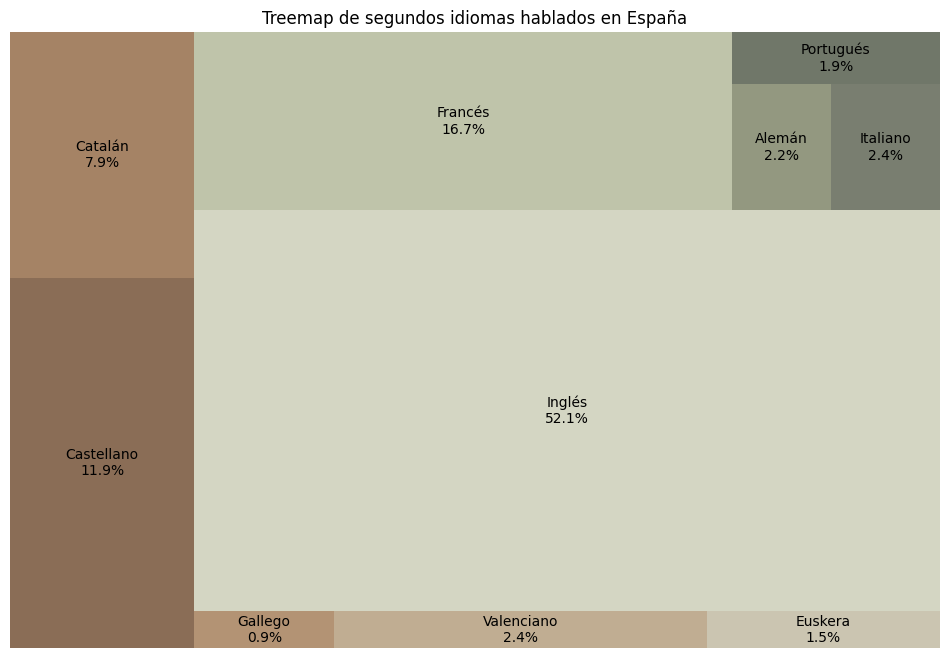

In [4]:

# Extraemos la fila con el total
total_row = df_idiomas_no_maternos.drop(columns = ["Total personas que pueden usar idiomas no maternos", "Categoria"]).iloc[0]
values = total_row.values
labels = total_row.index

# Calculamos porcentajes
total = values.sum()
percentages = [f"{(val/total*100):.1f}%" for val in values]
combined_labels = [f"{label}\n{perc}" for label, perc in zip(labels, percentages)]

colors = ["#582f0e","#7f4f24","#936639","#a68a64","#b6ad90","#c2c5aa","#a4ac86","#656d4a","#414833","#333d29"]

# Creamos el treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=values, label=combined_labels, color=colors, alpha=0.7)
plt.axis('off')
plt.title('Treemap de segundos idiomas hablados en España')
plt.show()

# Marimekko Chart

In [5]:
df_sales_data = pd.read_csv("../data/sales_data.csv")

In [6]:
df_sales_data

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Cost.1,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2/3/2023,Bob,North,5053.97,18,Furniture,152.75,152.75,Returning,0.09,Cash,Online,North-Bob
1,1093,4/21/2023,Bob,West,4384.02,17,Furniture,3816.39,3816.39,Returning,0.11,Cash,Retail,West-Bob
2,1015,9/21/2023,David,South,4631.23,30,Food,261.56,261.56,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,8/24/2023,Bob,South,2167.94,39,Clothing,4330.03,4330.03,New,0.02,Credit Card,Retail,South-Bob
4,1061,3/24/2023,Charlie,East,3750.20,13,Electronics,637.37,637.37,New,0.08,Credit Card,Online,East-Charlie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1010,4/15/2023,Charlie,North,4733.88,4,Food,4943.03,4943.03,Returning,0.29,Cash,Online,North-Charlie
996,1067,9/7/2023,Bob,North,4716.36,37,Clothing,1754.32,1754.32,New,0.21,Bank Transfer,Retail,North-Bob
997,1018,4/27/2023,David,South,7629.70,17,Clothing,355.72,355.72,Returning,0.06,Bank Transfer,Online,South-David
998,1100,12/20/2023,David,West,1629.47,39,Electronics,3685.03,3685.03,New,0.01,Bank Transfer,Online,West-David


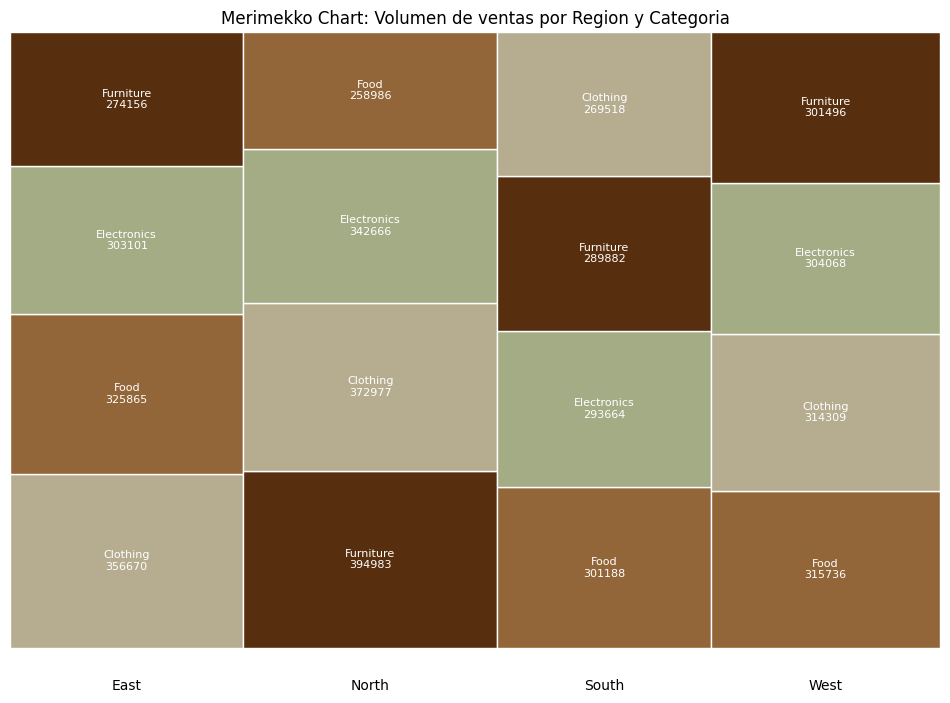

In [7]:
# 1. Calculamos el total de ventas por región y el total global
region_totals = df_sales_data.groupby('Region')['Sales_Amount'].sum()
total_sales = region_totals.sum()

# 2. Calculamos el desglose de ventas por región y categoría de producto
breakdown = df_sales_data.groupby(['Region', 'Product_Category'])['Sales_Amount'].sum().reset_index()

# 3. Asignamos un color a cada categoría de producto
product_categories = df_sales_data['Product_Category'].unique()
color_dict = {cat: colors[i*2] for i, cat in enumerate(product_categories)}

# 4. Creamos la gráfica Merimekko
fig, ax = plt.subplots(figsize=(12, 8))

x_start = 0  # posición inicial en x para la primera región
for region in region_totals.index:
    # El ancho de la columna es proporcional a las ventas de la región
    region_width = region_totals[region] / total_sales
    
    # Filtramos y ordenar los datos para la región actual
    region_data = breakdown[breakdown['Region'] == region].sort_values('Sales_Amount', ascending=False)
    y_start = 0  # posición inicial en y para apilar las categorías
    
    for _, row in region_data.iterrows():
        # La altura de cada bloque es proporcional a la contribución de la categoría en esa región
        height = row['Sales_Amount'] / region_totals[region]
        
        # Dibujmos el rectángulo para la categoría de producto
        rect = plt.Rectangle(
            (x_start, y_start), region_width, height,
            facecolor=color_dict[row['Product_Category']],
            edgecolor='white'
        )
        ax.add_patch(rect)
        
        # Añadimos etiquetas con el volumne de ventas
        ax.text(x_start + region_width/2, y_start + height/2,
                f"{row['Product_Category']}\n{row['Sales_Amount']:.0f}",
                ha='center', va='center', fontsize=8, color='white')
        y_start += height  # actualizamos la posición en y para el siguiente bloque
    
    # Añadimos la etiqueta de la región centrada debajo de la columna
    ax.text(x_start + region_width/2, -0.05, region, ha='center', va='top', fontsize=10)
    x_start += region_width  # actualizamos la posición en x para la siguiente región

# Configuramos los límites y quitamos los ejes para una mejor visualización
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.title('Merimekko Chart: Volumen de ventas por Region y Categoria')
plt.show()


# Beeswarm Chart

In [8]:
df_sales_data["Sales_Rep"].unique()

array(['Bob', 'David', 'Charlie', 'Eve', 'Alice'], dtype=object)

In [9]:
# Define a custom palette for each Sales Rep
custom_palette = {
    'Bob': colors[0],     
    'David': colors[1],    
    'Charlie': colors[2],
    'Eve': colors[3],
    'Alice': colors[4]
}

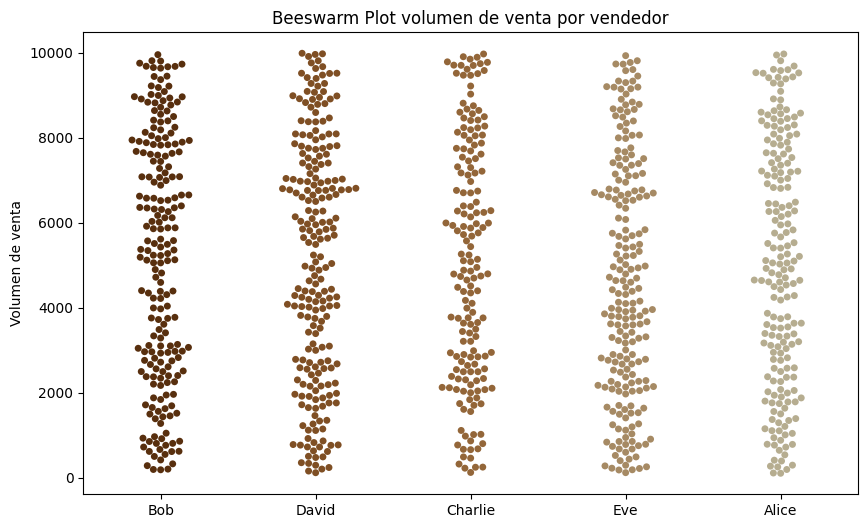

In [10]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Sales_Rep', y='Sales_Amount', hue='Sales_Rep', palette = custom_palette, data=df_sales_data, legend=False)
plt.title('Beeswarm Plot volumen de venta por vendedor')
plt.xlabel('')
plt.ylabel('Volumen de venta')
plt.show()